In [8]:
from numpy import cos, sin, pi, absolute, arange
# from scipy.signal import kaiserord, lfilter, firwin, freqz
# from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show
import numpy as np
from matplotlib import pyplot as plt
import torch 
import scipy.signal
import torch 

In [56]:
def get_fft( x ):
    return np.array( abs( torch.fft.fft(torch.tensor(x)) )  )    

In [52]:
def vis_signal(t, x):
    plt.plot(t, x, 'r')
    plt.show()

In [54]:
def vis_fft(freq, fft):
    plt.stem(freq, fft, linefmt='b', markerfmt=" ", basefmt="-b")
    plt.show()

In [21]:
def vis_filter( x ):
    plt.plot(x, 'bo-', linewidth=2)
    plt.title('Filter Coefficients (%d taps)' % len(x))
    plt.grid(True)

In [49]:
def vis_frequency_response( x, sample_rate ):
    w, h = scipy.signal.freqz(x, worN=100)
    nyq_rate = sample_rate // 2 
    plt.plot( (w/pi)*nyq_rate, absolute(h), linewidth=2 )
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.title('Frequency Response')
    plt.grid(True)
    # plt.savefig('xx.png', facecolor='white', transparent=False)

In [42]:
def get_filter_func1( sample_rate, width, ripple_db, cutoff ):
        
    # The Nyquist rate of the signal.
    nyq_rate = sample_rate / 2.0

    # The desired width of the transition from pass to stop relative to the Nyquist rate.
    width = width/nyq_rate

    # Compute the order and Kaiser parameter for the FIR filter.
    N, beta = scipy.signal.kaiserord(ripple_db, width)

    # Use firwin with a Kaiser window to create a lowpass FIR filter.
    return scipy.signal.firwin(N, cutoff/nyq_rate, window=('kaiser', beta))
    

In [76]:
def get_filter_func2( sample_rate, width, numtaps, cutoff ):
    return scipy.signal.firwin(numtaps=numtaps, cutoff=cutoff, width=width, fs=sample_rate)    

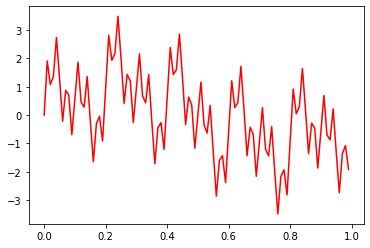

In [63]:
# Let's first create a signal with different frequency and vis it in time domain.

sample_rate = 100.0
t = arange(sample_rate) / sample_rate

freq = 1
x = sin(2*pi*freq*t) 

freq = 5
x += sin(2*pi*freq*t)

freq = 10
x += sin(2*pi*freq*t)

freq = 30
x += sin(2*pi*freq*t)

vis_signal(t, x)

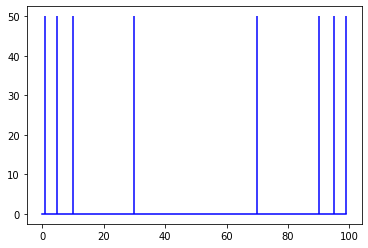

In [64]:
# vis its fft 
vis_fft( np.arange(len(x)), get_fft(x)  )

In [65]:
# Next, we will introduce two functions to design filters. 
# In the first one, you can specify: width, stopband attenuation, cutoff. 


In [78]:
# transition bandwidth in Hz
width = 5 

# The desired attenuation in the stop band, in dB.
# Note: dB is calculated as 10*log(power_o / power_1) or 20*log( voltage_o / voltage_1)
ripple_db = 60.0

# The cutoff frequency of the filter.
cutoff = 20.0

# calculate filter 
low_pass_filter1 = get_filter_func1( sample_rate, width, ripple_db, cutoff )

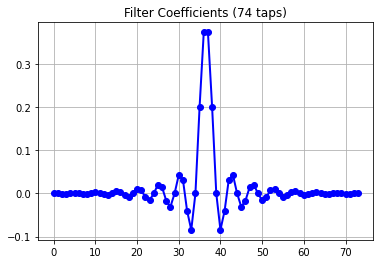

In [79]:
# Let's look at this filter
vis_filter(low_pass_filter1)

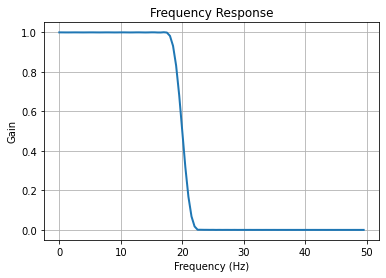

In [80]:
# Also vis its frequency response
vis_frequency_response(low_pass_filter1, sample_rate)

In [81]:
# Let's filter the orginal signal x 
filtered_x = scipy.signal.lfilter( low_pass_filter1, 1.0, x)

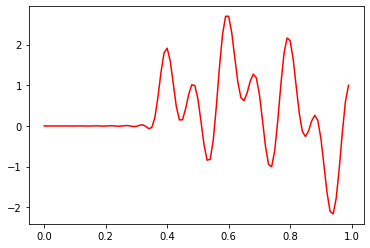

In [82]:
# vis the filtered signal x
vis_signal(t, filtered_x)

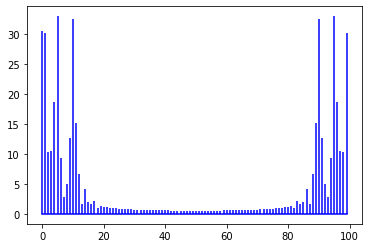

In [83]:
# vis the filtered signal fft
vis_fft( np.arange(len(filtered_x)), get_fft(filtered_x)  )

In [72]:
# One can see, sigal above 20 is basically gone, and we can still see its peaks around 1 5 and 10

In [73]:
# Let's try the other method to crate filter. 
# In this case, you can specify: width, numtaps, cutoff. 

In [102]:
width = 5
numtaps = 12
cutoff = 20 
low_pass_filter2 = get_filter_func2( sample_rate, width, numtaps, cutoff )

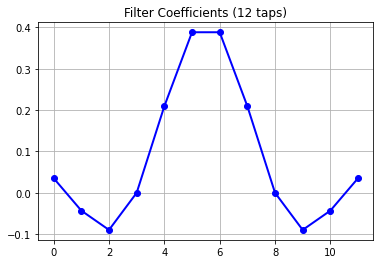

In [103]:
# Let's look at this filter
vis_filter(low_pass_filter2)

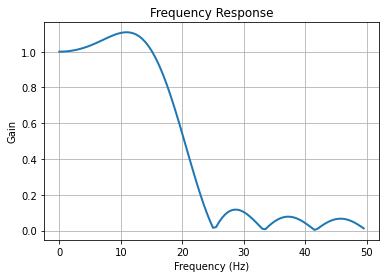

In [104]:
# Also vis its frequency response
vis_frequency_response(low_pass_filter2, sample_rate)

In [105]:
# Let's filter the orginal signal x 
filtered_x = scipy.signal.lfilter( low_pass_filter2, 1.0, x)

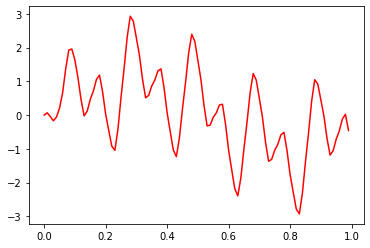

In [106]:
# vis the filtered signal x
vis_signal(t, filtered_x)

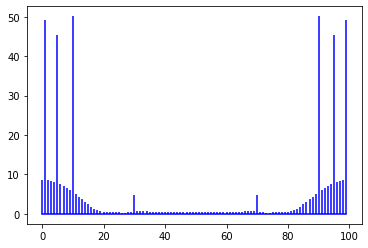

In [107]:
# vis the filtered signal fft
vis_fft( np.arange(len(filtered_x)), get_fft(filtered_x)  )